<a href="https://colab.research.google.com/github/KarivetiKeerthi/Scaler-Projects/blob/main/Scaler_Clustering_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install numpy

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 65.8MB/s]


In [ ]:
df = pd.read_csv("scaler_clustering.csv",index_col=0)

In [ ]:
df.sample(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
47220,mqgvawgb rxbxnta,2ab122315264c6cc14e578e0217923f6850fb729dd1a6b...,2012.0,1000000,SDET,2017.0
121712,nwo mvzsvrgqt,bbb8172fd9b6853c8a768774c66f60dd8d5a023e731887...,2019.0,340000,Other,2019.0
121819,atrgxnnt xzaxv geexwto ge nyt ho,71907ffef745b0df03f889fc41162911d536454f13099d...,2019.0,1240000,Other,2019.0
182816,srgmvzn xzaxv,d25fc8c3daa0f57df5d438a15bf3c64f62c0585e9a166f...,2015.0,850000,Backend Engineer,2020.0
149313,wsx,16bbaab8872f08d974728f50951d2bca92a35bdfdf5f8c...,2017.0,380000,Backend Engineer,2019.0
104812,dvznyqgz togrhnxgz,c27431192929da25b554a84508c573b36658def45141fd...,2020.0,300000,NaN,2021.0
48865,tdutaxv xzw,38ab29a285e91dce551670b58ec1f8b8b25423305ecdec...,2014.0,1400000,FullStack Engineer,2019.0
57166,wgszxkvzn,61f20854c1c7554053658fbd264c5b3784bc5542e18e10...,2018.0,360000,Support Engineer,2021.0
121404,gqvwrt,1a22481acad6a27e1a136e548e8493bd209ff62f80ecb0...,2018.0,1200000,Backend Engineer,2021.0
30572,wqgbungz sqtvcto,f1f1307053f9065d95117f9ea8ce14a65d0bbf78ef7a3a...,2017.0,670000,Other,2020.0


In [ ]:
df.shape

(205843, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [ ]:
df.describe(include="object")

,company_hash,email_hash,job_position
count,205799,205843,153279
unique,37299,153443,1016
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [ ]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [ ]:
(df.isna().sum()/ len(df))*100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.535967
ctc_updated_year     0.000000
dtype: float64

In [ ]:
unique = df.nunique()
unique

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1016
ctc_updated_year         7
dtype: int64

In [ ]:
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [ ]:
df["company_hash"].nunique()

37299

In [ ]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x)))
df["company_hash"].nunique()

37208

In [ ]:
df["job_position"].nunique()

1016

In [ ]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x)))
df["job_position"].nunique()

856

In [ ]:
df.drop("email_hash",axis = 1,inplace=True)

In [ ]:
df.sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
53572,bvptbjnqxuwgb,2014.0,2300000,backend engineer,2019.0
44837,lubgqsvz wyvot wg,2018.0,1400000,fullstack engineer,2021.0
164117,mxagzygbto agnwgb uqxcvnt rxbxnta,2013.0,1270000,nan,2019.0
172041,wvrogen,2019.0,900000,backend engineer,2021.0
166536,vkhqt ugftq,2019.0,800000,other,2020.0
105208,ouxqxn exnztoo,2010.0,5000,fullstack engineer,2017.0
176656,eqtoytq,2020.0,1000000,nan,2019.0
69398,bjztfwvq,2018.0,550000,android engineer,2021.0
39250,x vb v eqtoytq,2020.0,200000000,frontend engineer,2019.0
71614,jvnqv gzrxzt ucn rna,2013.0,1700000,frontend engineer,2019.0


In [ ]:
df.duplicated().sum()

17598

In [ ]:
df.isna().sum()

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [ ]:
(df["company_hash"] == "").sum()

89

In [ ]:
(df["company_hash"] == "nan").sum()

44

In [ ]:
(df["job_position"] == "").sum()

9

In [ ]:
(df["job_position"] == "nan").sum()

52564

In [ ]:
df[(df["company_hash"] == "") | (df["job_position"] == "")].sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
130750,,2019.0,700000,nan,2019.0
179932,,2007.0,2200000,other,2019.0
159538,,2018.0,950000,frontend engineer,2017.0
143041,,2014.0,115000,fullstack engineer,2015.0
83565,,1993.0,450000,backend engineer,2021.0
166129,,2013.0,1200000,backend engineer,2019.0
124347,,2015.0,380000,fullstack engineer,2019.0
150564,,2018.0,300000,other,2019.0
112973,,2019.0,200000000,nan,2019.0
125243,,2015.0,500000,engineering leadership,2019.0


In [ ]:
len(df[(df["company_hash"] == "") | (df["job_position"] == "")])

98

In [ ]:
df = df[~((df["company_hash"] == "") | (df["job_position"] == ""))]
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


# **DATA PREPROCCESSING**

In [ ]:
df["orgyear"].isna().sum()

86

In [ ]:
df.groupby("company_hash")["orgyear"].transform("median")

0         2014.0
1         2016.0
2         2015.0
3         2016.0
4         2017.0
           ...  
206918    2018.0
206919    2017.0
206920    2016.0
206921    2020.0
206922    2015.0
Name: orgyear, Length: 205745, dtype: float64

In [ ]:
df["orgyear"].fillna(df['orgyear'].isnull().sum(),inplace=True)

In [ ]:
df["orgyear"].isna().sum()

0

In [ ]:
df.sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
87434,xzegojo,2014.0,800000,nan,2021.0
45779,wgzahtzn,2012.0,1100000,backend engineer,2020.0
169527,wqtvntmjnto,2019.0,850000,nan,2021.0
126769,tuvb ojontbo,2019.0,1200000,nan,2019.0
119037,ovbohzs trtwnqgzxwo,2016.0,1500000,product manager,2021.0
42673,hguxv,2017.0,850000,frontend engineer,2020.0
19960,nvnv wgzohrnvzwj otqcxwto,2018.0,400000,backend engineer,2021.0
113558,wqgfavzvrjnxd,2018.0,600000,data scientist,2021.0
13211,wrtqxoj ogrhnxgzo ucn rna,2010.0,500000,backend engineer,2021.0
176488,atrr,1997.0,4500000,engineering leadership,2019.0


## OUTLIER TREATMENT

In [ ]:
df["orgyear"].value_counts()

orgyear
2018.0    25240
2019.0    23402
2017.0    23237
2016.0    23038
2015.0    20602
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: count, Length: 78, dtype: int64

count have to be done

Text(0.5, 1.0, 'CountPlot')

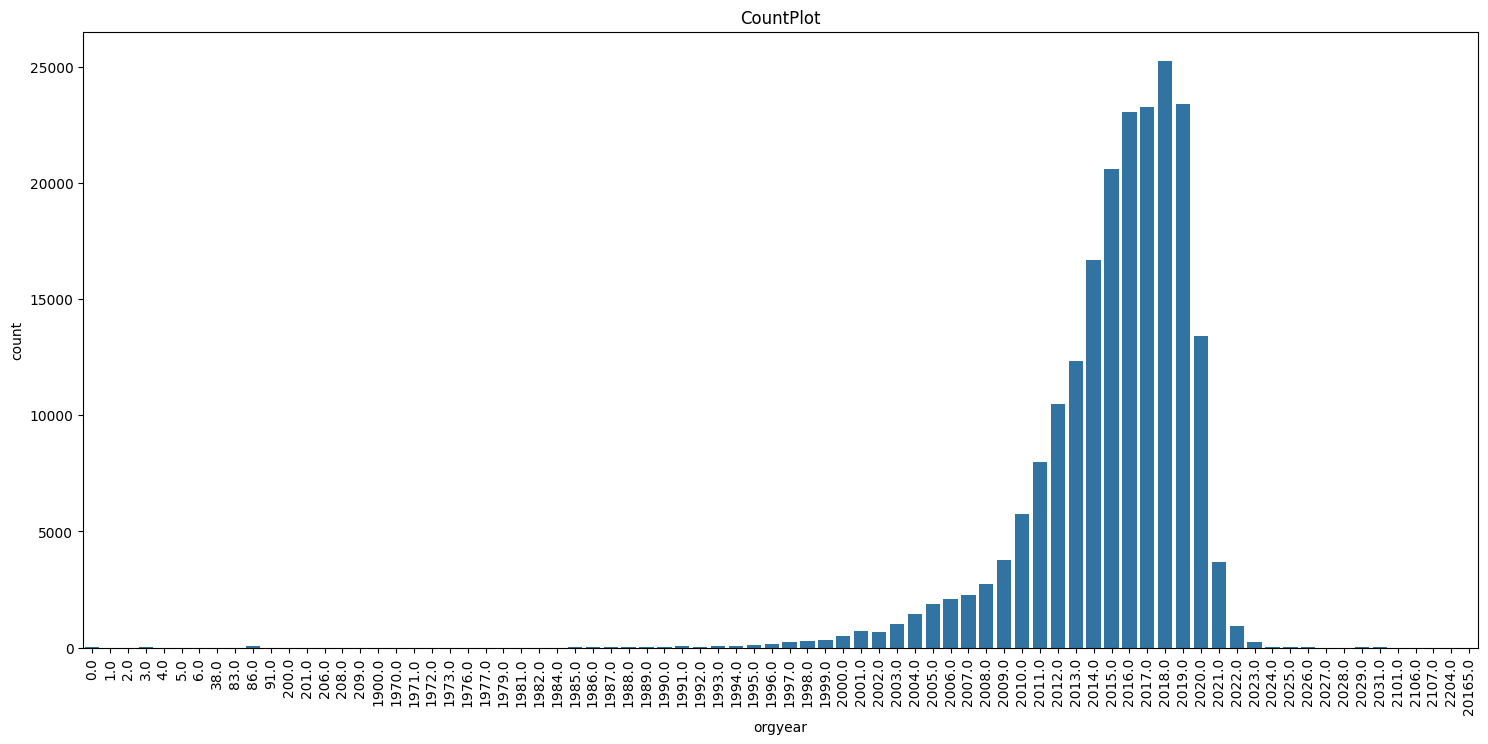

In [ ]:
plt.figure(figsize=(18,8))
countplot_01 = sns.countplot(x='orgyear', data=df)
plt.xticks(rotation = 90)
plt.title("CountPlot")

In [ ]:
df["orgyear"].quantile(0.001)

1990.0

In [ ]:
df["orgyear"].quantile(0.999)

2023.0

In [ ]:
df["orgyear"] = df["orgyear"].clip(1990,2022)

count plot have to be done

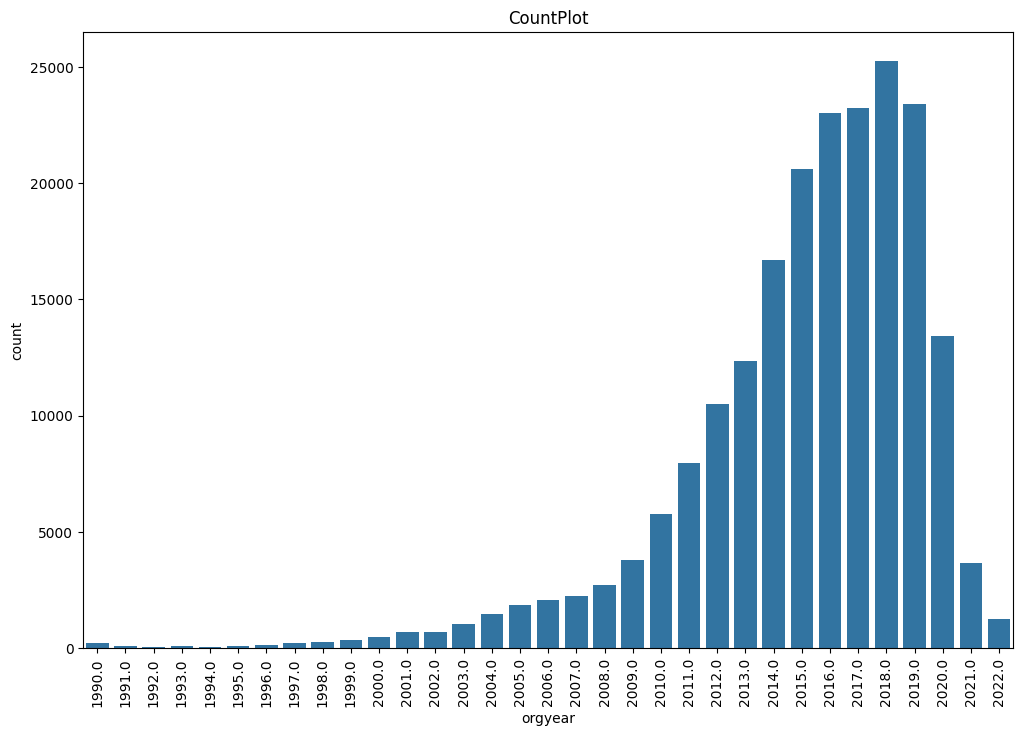

In [ ]:
countplot_02 = sns.countplot(x='orgyear', data=df)
plt.xticks(rotation = 90)
plt.title("CountPlot")
plt.show()

CTC updated year

In [ ]:
df["ctc_updated_year"].quantile(0.001)

2015.0

In [ ]:
df["ctc_updated_year"].quantile(0.99)

2021.0

count plot hve to be done

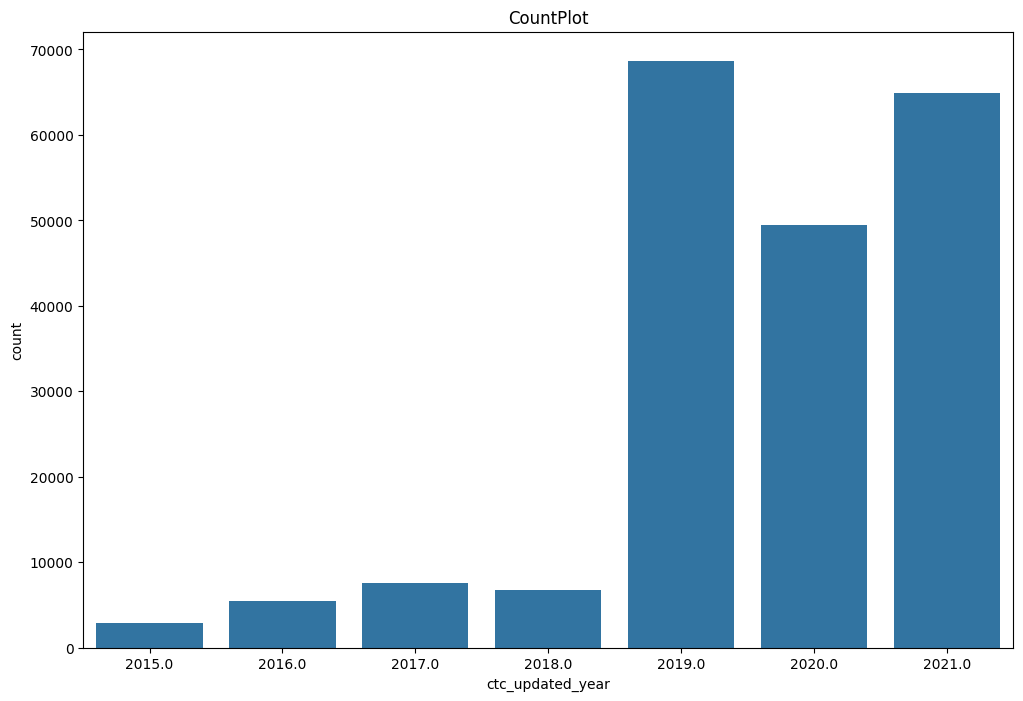

In [ ]:
countplot_03 = sns.countplot(x='ctc_updated_year', data=df)
plt.title("CountPlot")
plt.show()

OUTLIER TREATMENT FOR CTC

In [ ]:
df["ctc"].quantile(0.01)

37000.0

In [ ]:
df["ctc"].quantile(0.999)

200000000.0

In [ ]:
df = df.loc[((df.ctc) > df.ctc.quantile(0.01)) & ((df.ctc) < df.ctc.quantile(0.99))]
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


distplot h to be dne

<Axes: xlabel='ctc', ylabel='Density'>

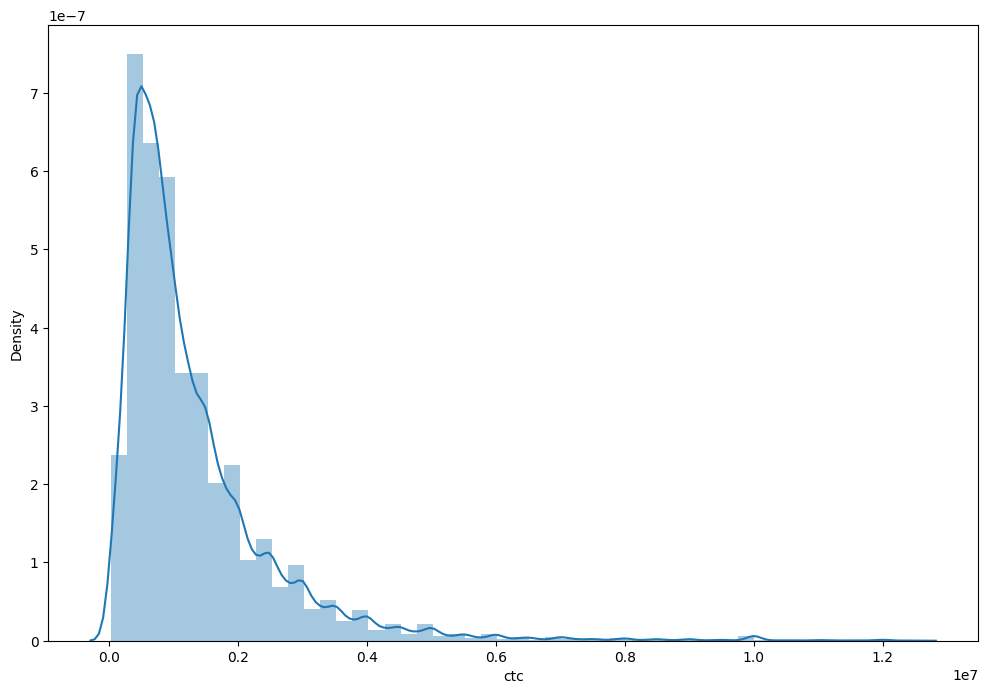

In [ ]:
sns.distplot(df["ctc"])

In [ ]:
df.loc[df['job_position']=='nan', 'job_position']=np.nan

In [ ]:
df.loc[df["company_hash"]=="nan","company_hash"] = np.nan

feature engineering

In [ ]:
df.loc[df.groupby("company_hash")["ctc"].transform("count") < 5,"company_hash"] = "Others"

In [ ]:
(df["company_hash"] == "Others").sum()

46434

In [ ]:
df['orgyear'].describe()

count    201625.000000
mean       2015.104769
std           4.256063
min        1990.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2022.000000
Name: orgyear, dtype: float64

years of experience = current year - employement start year

In [ ]:
df["years_of_experience_in_organization"] = 2023 - df["orgyear"]

In [ ]:
df.sample(3)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
117175,Others,2020.0,300000,NaN,2021.0,3.0
73375,rgsbtxz,2017.0,1100000,NaN,2021.0,6.0
59387,wxmtq srgmvr,2005.0,1500000,product designer,2021.0,18.0


count plot h to be d

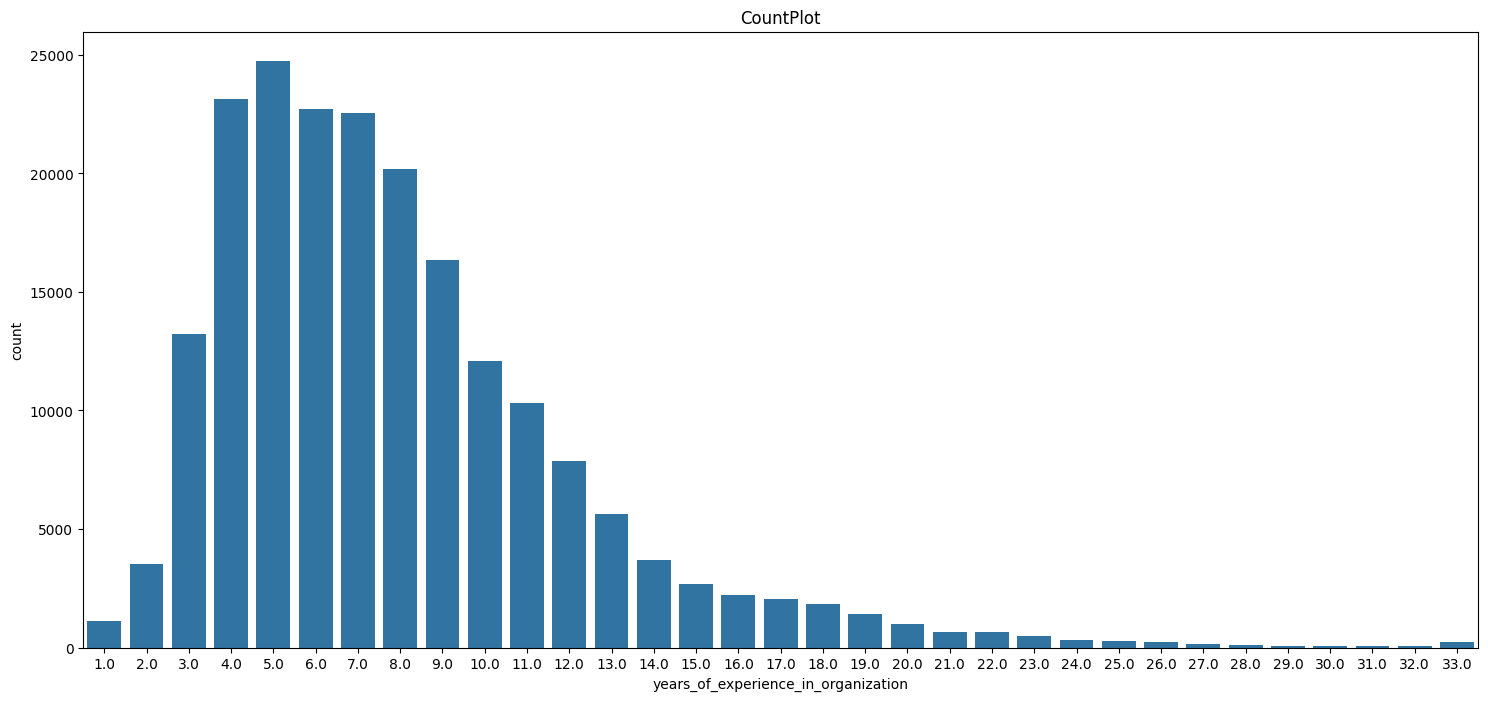

In [ ]:
plt.figure(figsize=(18,8))
countplot_03 = sns.countplot(x='years_of_experience_in_organization', data=df)
plt.title("CountPlot")
plt.show()

In [ ]:
df.duplicated().sum()

37684

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(163941, 6)

In [ ]:
df.isna().sum()

company_hash                              42
orgyear                                    0
ctc                                        0
job_position                           36746
ctc_updated_year                           0
years_of_experience_in_organization        0
dtype: int64

In [ ]:
(df["ctc_updated_year"] < df["orgyear"]).sum()

7181

In [ ]:
df.ctc_updated_year = df[["ctc_updated_year","orgyear"]].max(axis = 1)

In [ ]:
(df["ctc_updated_year"] < df["orgyear"]).sum()

0

In [ ]:
df.sample(3)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
183858,vbvkgz,2015.0,3900000,fullstack engineer,2019.0,8.0
137429,wgxznqxmt ntwyzgrgsxto,2012.0,840000,frontend engineer,2019.0,11.0
183546,Others,2019.0,700000,devops engineer,2019.0,4.0


Filling null values with others -- if not done before

In [ ]:
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [ ]:
df.isna().sum()

company_hash                           0
orgyear                                0
ctc                                    0
job_position                           0
ctc_updated_year                       0
years_of_experience_in_organization    0
dtype: int64

In [ ]:
df.duplicated().sum()

1061

In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization
count,163941.000000,1.639410e+05,163941.000000,163941.000000
mean,2014.772192,1.425504e+06,2019.595531,8.227808
std,4.402055,1.303987e+06,1.334961,4.402055
min,1990.000000,3.800000e+04,2015.000000,1.000000
25%,2013.000000,6.000000e+05,2019.000000,5.000000
50%,2016.000000,1.039999e+06,2020.000000,7.000000
75%,2018.000000,1.800000e+06,2021.000000,10.000000
max,2022.000000,1.250000e+07,2022.000000,33.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163941 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   company_hash                         163941 non-null  object 
 1   orgyear                              163941 non-null  float64
 2   ctc                                  163941 non-null  int64  
 3   job_position                         163941 non-null  object 
 4   ctc_updated_year                     163941 non-null  float64
 5   years_of_experience_in_organization  163941 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.8+ MB


scatter plot

<Axes: xlabel='ctc', ylabel='years_of_experience_in_organization'>

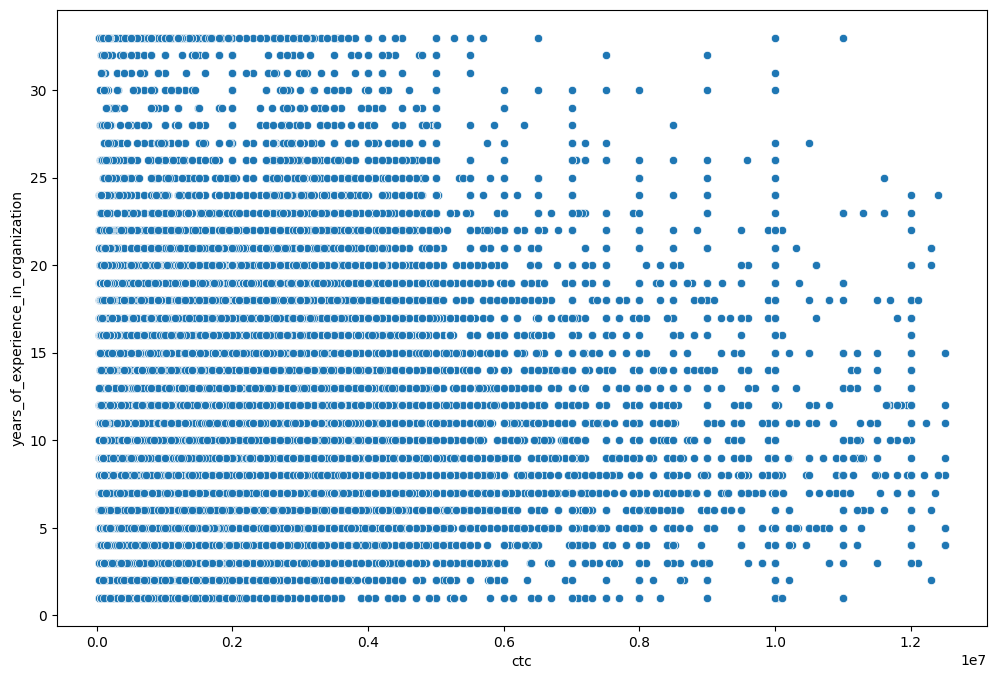

In [ ]:
sns.scatterplot(x= df.ctc, y= df.years_of_experience_in_organization)

In [ ]:
df.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization'],
      dtype='object')

Manual Clustering based on Company , Job position and Years of experience
Learner's "designation_in_organization"

In [ ]:
GROUPED_CTC = df.groupby(["years_of_experience_in_organization", "job_position", "company_hash"])["ctc"].describe()

In [ ]:
GROUPED_CTC

count  \
years_of_experience_in_organization job_position       company_hash                               
1.0                                 Others             Others                              58.0   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz        1.0   
                                                       atrgxnnt                             1.0   
                                                       atrr                                 1.0   
                                                       atrr ntwyzgrgsxto                    2.0   
...                                                                                         ...   
33.0                                qa engineer        hzxntaytvrny sqghu                   1.0   
                                                       tmxd ogenfvqt xzaxv ucn rna          1.0   
                                                       utrvnqg ogrhnxgzo ucnrna             1.0   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx    1.0   
                                    support engineer   Others                               2.0   

                                                                                                  mean  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             1.586207e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz      1.600000e+06   
                                                       atrgxnnt                           1.000000e+06   
                                                       atrr                               1.000000e+06   
                                                       atrr ntwyzgrgsxto                  1.000000e+06   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                 5.400000e+05   
                                                       tmxd ogenfvqt xzaxv ucn rna        1.220000e+06   
                                                       utrvnqg ogrhnxgzo ucnrna           6.000000e+05   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx  1.400000e+06   
                                    support engineer   Others                             3.700000e+05   

                                                                                                   std  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             2.080212e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz               NaN   
                                                       atrgxnnt                                    NaN   
                                                       atrr                                        NaN   
                                                       atrr ntwyzgrgsxto                  2.828427e+05   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                          NaN   
                                                       tmxd ogenfvqt xzaxv ucn rna                 NaN   
                                                       utrvnqg ogrhnxgzo ucnrna                    NaN   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx           NaN   
                                    support engineer   Others                             3.252691e+05   

                                            

In [ ]:
df_GROUPED_CTC_BY_E_P_C = df.merge(GROUPED_CTC,
        on = ["years_of_experience_in_organization","job_position","company_hash"],
        how = "left")

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163936,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
163937,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0
163938,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
163939,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0


In [ ]:
def classification(x,ctc_50,ctc_75):
    if x < ctc_50:
        return 3
    elif x >= ctc_50 and x <= ctc_75:
        return 2
    elif  x >= ctc_75:
        return 1

In [ ]:
df_GROUPED_CTC_BY_E_P_C["designation_in_organization"] = df_GROUPED_CTC_BY_E_P_C.apply(lambda x:classification(x["ctc"],x["50%"],x["75%"]),axis = 1)

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163936,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163937,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163938,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163939,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.designation_in_organization.value_counts(normalize=True)

designation_in_organization
2    0.456378
3    0.331668
1    0.211954
Name: proportion, dtype: float64

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163936,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163937,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163938,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163939,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.drop(columns=['count','mean','std','min','25%','50%','75%','max'],axis = 1,inplace=True)

In [ ]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2
...,...,...,...,...,...,...,...
163936,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2
163937,husqvawgb,2017.0,500000,Others,2020.0,6.0,3
163938,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2
163939,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1


In [ ]:
df_GROUPED_CTC_BY_E_P_C.shape

(163941, 7)

Manual Clustering on company and job position

In [ ]:
GROUPED_C_J=df.groupby(['job_position','company_hash'])['ctc'].describe()
GROUPED_C_J

count  \
job_position          company_hash                                       
Others                Others                                    3520.0   
                      a ntwyzgrgsxto                               6.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0   
                      abwavnv ojontb                               1.0   
                      adw ntwyzgrgsj                              69.0   
...                                                                ...   
wordpress developer   Others                                       1.0   
worker                zgn vuurxwvmrt vwwghzn                       1.0   
x                     Others                                       1.0   
young professional ii sgctqzbtzn ge xzaxv                          1.0   
zomato                kgbvng                                       2.0   

                                                                        mean  \
job_position          company_hash                                             
Others                Others                                    1.366188e+06   
                      a ntwyzgrgsxto                            1.229167e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  5.000000e+05   
                      abwavnv ojontb                            7.000000e+05   
                      adw ntwyzgrgsj                            8.502319e+05   
...                                                                      ...   
wordpress developer   Others                                    6.000000e+05   
worker                zgn vuurxwvmrt vwwghzn                    2.000000e+05   
x                     Others                                    4.000000e+05   
young professional ii sgctqzbtzn ge xzaxv                       5.000000e+05   
zomato                kgbvng                                    3.000000e+05   

                                                                         std  \
job_position          company_hash                                             
Others                Others                                    1.445330e+06   
                      a ntwyzgrgsxto                            1.401465e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna           NaN   
                      abwavnv ojontb                                     NaN   
                      adw ntwyzgrgsj                            1.036041e+06   
...                                                                      ...   
wordpress developer   Others                                             NaN   
worker                zgn vuurxwvmrt vwwghzn                             NaN   
x                     Others                                             NaN   
young professional ii sgctqzbtzn ge xzaxv                                NaN   
zomato                kgbvng                                    2.828427e+05   

                                                                     min  \
job_position          company_hash                                         
Others                Others                                     40000.0   
                      a ntwyzgrgsxto                            350000.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0   
                      abwavnv ojontb                            700000.0   
                      adw ntwyzgrgsj                             80000.0   
...                                                                  ...   
wordpress developer   Others                                    600000.0   
worker                zgn vuurxwvmrt vwwghzn                    200000.0   
x                     Others                                    400000.0   
young professional ii sgctqzbtzn ge xzaxv                       500000.0   
zomato                kgbvng                                    100000.0   

                               

In [ ]:
df_GROUPED_C_J=df.merge(GROUPED_C_J, on=['job_position','company_hash'], how='left')

In [ ]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
15578,uhmrxwxo ovuxtzn,2015.0,1000000,devops engineer,2020.0,8.0,5.0,1.336000e+06,574656.419089,700000.0,1000000.0,1350000.0,1400000.0,2230000.0
133788,mtrkvmvq ogenfvqt atoxsz xzaxv uqxcvnt rxbxnta,2015.0,2060000,Others,2020.0,8.0,5.0,1.474000e+06,645507.552241,720000.0,840000.0,1750000.0,2000000.0,2060000.0
45401,wqta,2012.0,2000000,backend engineer,2016.0,11.0,11.0,2.746091e+06,899572.171040,1810000.0,2050000.0,2500000.0,3075000.0,4300000.0
65729,nxvv,2021.0,750000,fullstack engineer,2021.0,2.0,20.0,1.135500e+06,394534.702629,710000.0,837500.0,970000.0,1400000.0,2000000.0
161939,husqvawgb,2018.0,900000,other,2019.0,5.0,50.0,1.189000e+06,507137.804764,400000.0,807500.0,1000000.0,1500000.0,2400000.0


In [ ]:
df_GROUPED_C_J['classs'] = df_GROUPED_C_J.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,classs
133363,bvi ogenfvqt,2018.0,1125000,frontend engineer,2020.0,5.0,14.0,9.503571e+05,2.812777e+05,200000.0,900000.0,1050000.0,1118750.0,1200000.0,1
111881,bvyxzaqv qxot,2014.0,650000,Others,2021.0,9.0,2.0,6.850000e+05,4.949747e+04,650000.0,667500.0,685000.0,702500.0,720000.0,3
116759,Others,2020.0,590000,fullstack engineer,2021.0,3.0,3181.0,1.193104e+06,1.532888e+06,40000.0,350000.0,775000.0,1450000.0,12000000.0,3
73136,Others,2010.0,2400000,ios engineer,2019.0,13.0,790.0,1.138895e+06,1.120467e+06,40000.0,610000.0,850000.0,1377500.0,12000000.0,1
113317,onhatzn,2018.0,1800000,Others,2018.0,5.0,254.0,1.395008e+06,1.448730e+06,60000.0,500000.0,1000000.0,1792500.0,12100000.0,1


In [ ]:
df_GROUPED_C_J.classs.value_counts(normalize=True)

classs
3    0.435376
2    0.320103
1    0.244521
Name: proportion, dtype: float64

In [ ]:
df_GROUPED_C_J.drop(columns=['count','mean','std','min','25%','50%','75%','max'],axis = 1,inplace=True)

In [ ]:
df_GROUPED_CTC_BY_E_P_C.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
Name: 0, dtype: object

In [ ]:
df_GROUPED_C_J.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
classs                                              1
Name: 0, dtype: object

In [ ]:
df_Grouped = df_GROUPED_CTC_BY_E_P_C.merge(df_GROUPED_C_J, on=['company_hash','orgyear','ctc','job_position',
                                                               'years_of_experience_in_organization','ctc_updated_year'], how='left')

In [ ]:
df_Grouped.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs
39999,Others,2013.0,1150000,ios engineer,2019.0,10.0,1,2
16711,ntowg mtzsvrhqh,2012.0,2400000,fullstack engineer,2020.0,11.0,2,2
158185,bxwqgogen,2017.0,3300000,fullstack engineer,2021.0,6.0,2,2
157472,ovu,2015.0,1019999,fullstack engineer,2019.0,8.0,3,3
88672,oxtbtzo ytvrnyxzttqo,2014.0,1300000,fullstack engineer,2020.0,9.0,2,1


In [ ]:
df_Grouped.shape

(166227, 8)

Manual Clustering based on comapny

In [ ]:
GROUPED_C = df.groupby(['company_hash'])['ctc'].describe()
df_company = df.merge(GROUPED_C, on=['company_hash'], how='left')

In [ ]:
df_company.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
129921,wgbbowgut,2006.0,210000,engineering leadership,2021.0,17.0,19.0,1.376316e+06,8.741549e+05,210000.0,900000.0,1000000.0,1500000.0,3800000.0
129946,vbtqxwvz tduqtoo,2016.0,110000,backend engineer,2020.0,7.0,233.0,1.730343e+06,8.698728e+05,75000.0,1210000.0,1600000.0,2010000.0,7900000.0
153884,zgn vuurxwvmrt vwwghzn,2020.0,90000,android engineer,2021.0,3.0,2127.0,1.083449e+06,1.433050e+06,38000.0,360000.0,650000.0,1250000.0,12500000.0
143624,wvqo,2017.0,1500000,backend engineer,2020.0,6.0,28.0,1.848214e+06,1.268674e+06,250000.0,937500.0,1575000.0,2275000.0,5000000.0
143725,ytfrtnn uvwpvqa tzntquqxot,2017.0,1110000,data scientist,2019.0,6.0,369.0,1.493787e+06,1.464962e+06,50000.0,790000.0,1160000.0,1700000.0,12000000.0


In [ ]:
df_company['tier'] =df_company.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)

In [ ]:
df_company.tier.value_counts(normalize=True)

tier
3    0.477361
2    0.282913
1    0.239726
Name: proportion, dtype: float64

In [ ]:
df_company.drop(['count','mean','std','min','25%','50%','75%','max'],axis =1, inplace=True)

In [ ]:
df_company.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
tier                                                2
Name: 0, dtype: object

In [ ]:
df_Grouped.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
classs                                              1
Name: 0, dtype: object

In [ ]:
df_Grouped = df_Grouped.merge(df_company,
                 on=['company_hash','orgyear','ctc','job_position',
                     'years_of_experience_in_organization','ctc_updated_year'])

In [ ]:
df_Grouped

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...,...,...
171310,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2,3,3
171311,husqvawgb,2017.0,500000,Others,2020.0,6.0,3,3,3
171312,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2,3,3
171313,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1,1,1


In [ ]:
X = df_Grouped.copy()

In [ ]:
X.shape

(171315, 9)

In [ ]:
X_data = X.drop(["company_hash","job_position"],axis  = 1)

Final data for Model :

In [ ]:
X_data

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,2016.0,1100000,2020.0,7.0,2,1,2
1,2018.0,449999,2019.0,5.0,3,3,3
2,2015.0,2000000,2020.0,8.0,1,1,1
3,2017.0,700000,2019.0,6.0,3,3,3
4,2017.0,1400000,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...
171310,2008.0,220000,2019.0,15.0,2,3,3
171311,2017.0,500000,2020.0,6.0,3,3,3
171312,2021.0,700000,2021.0,2.0,2,3,3
171313,2019.0,5100000,2019.0,4.0,1,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_data)
X_sc = pd.DataFrame(scaler.transform(X_data), columns=X_data.columns, index=X_data.index)

In [ ]:
X_sc

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,0.229444,-0.238434,0.298202,-0.229444,-0.175909,-1.497119,-0.30055
1,0.680954,-0.741768,-0.452793,-0.680954,1.196397,1.001702,0.93366
2,0.003688,0.458489,0.298202,-0.003688,-1.548215,-1.497119,-1.53476
3,0.455199,-0.548177,-0.452793,-0.455199,1.196397,1.001702,0.93366
4,0.455199,-0.006126,-0.452793,-0.455199,-0.175909,-1.497119,-1.53476
...,...,...,...,...,...,...,...
171310,-1.576599,-0.919869,-0.452793,1.576599,-0.175909,1.001702,0.93366
171311,0.455199,-0.703049,0.298202,-0.455199,1.196397,1.001702,0.93366
171312,1.358221,-0.548177,1.049196,-1.358221,-0.175909,1.001702,0.93366
171313,0.906710,2.859000,-0.452793,-0.906710,-1.548215,-1.497119,-1.53476


hierarchical Custering :

write code

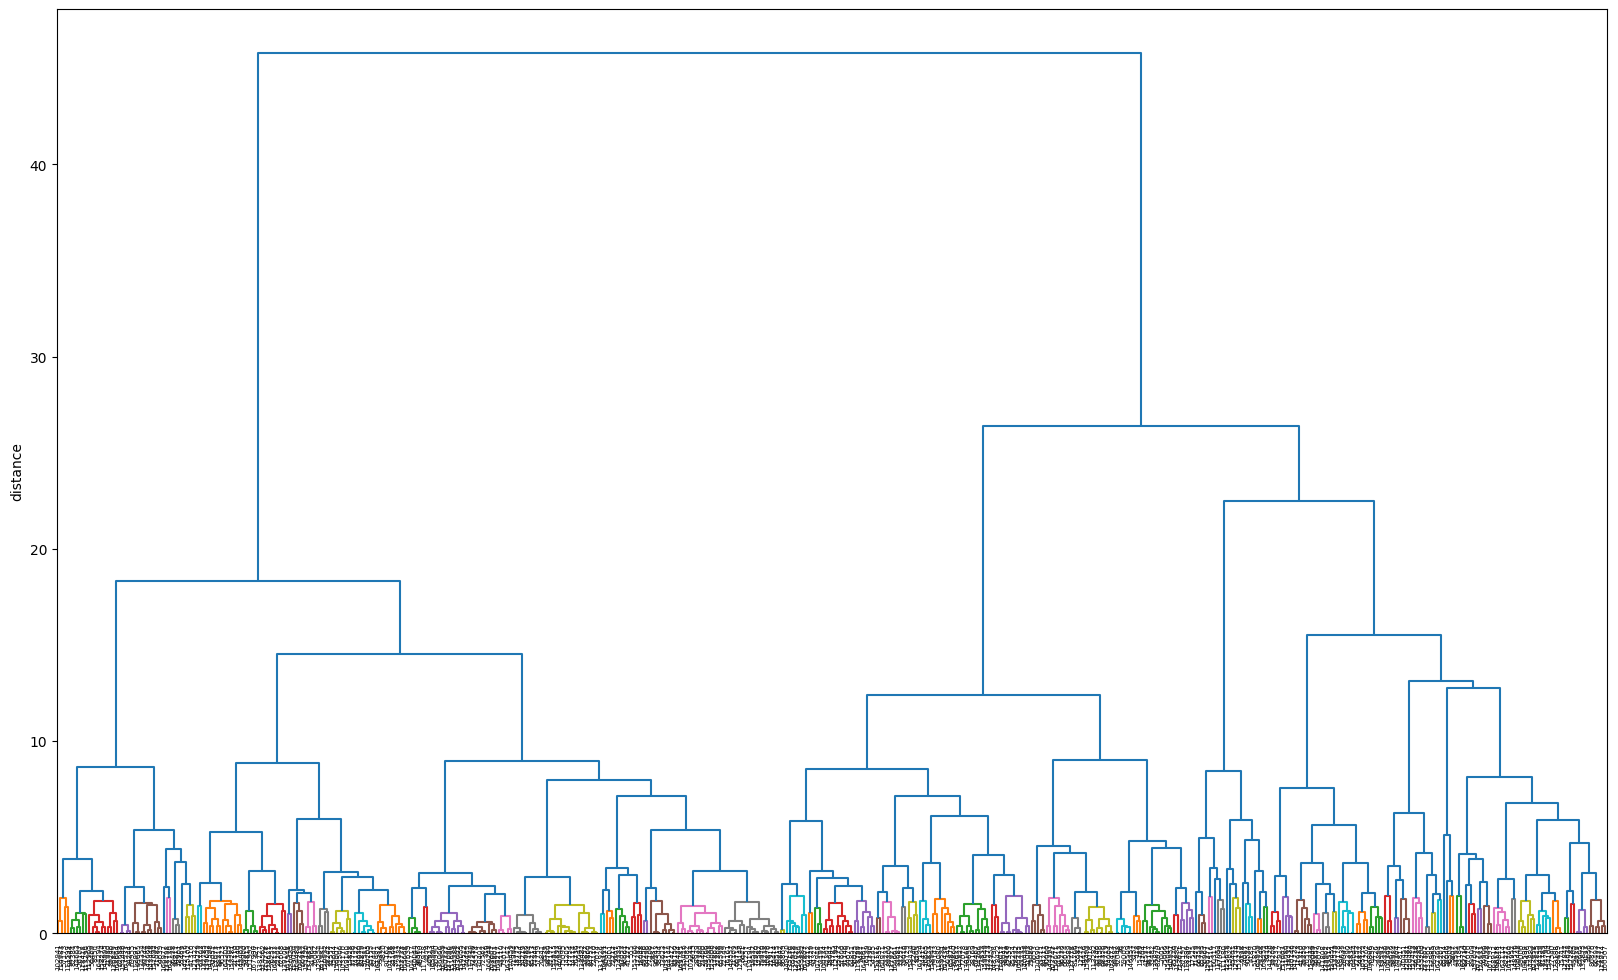

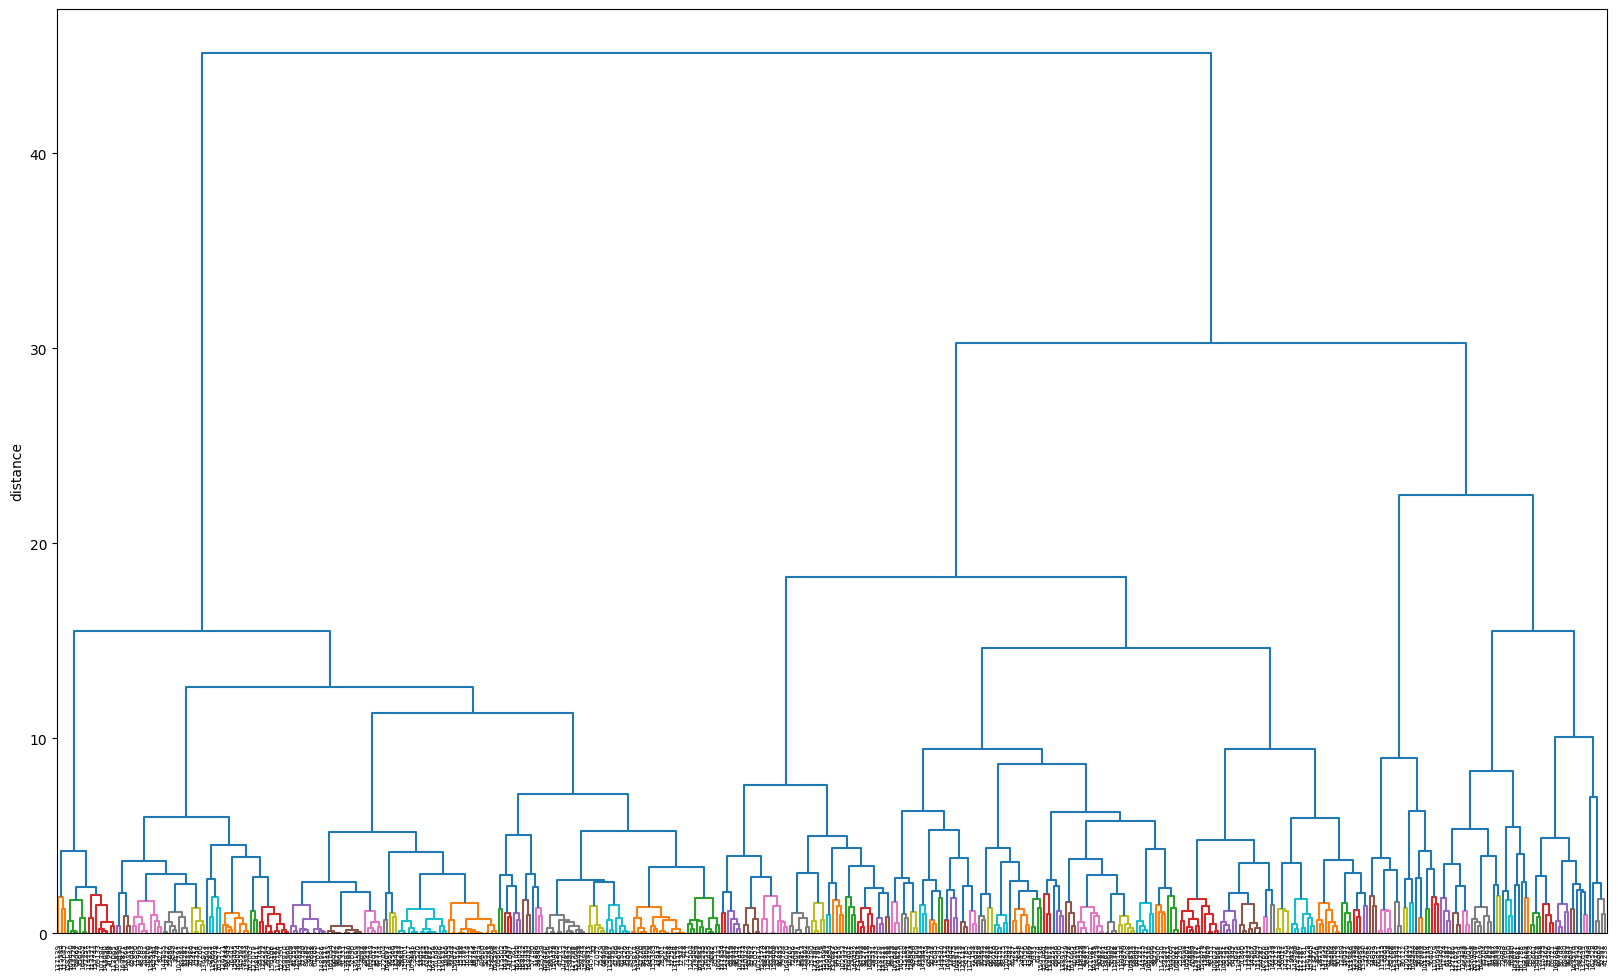

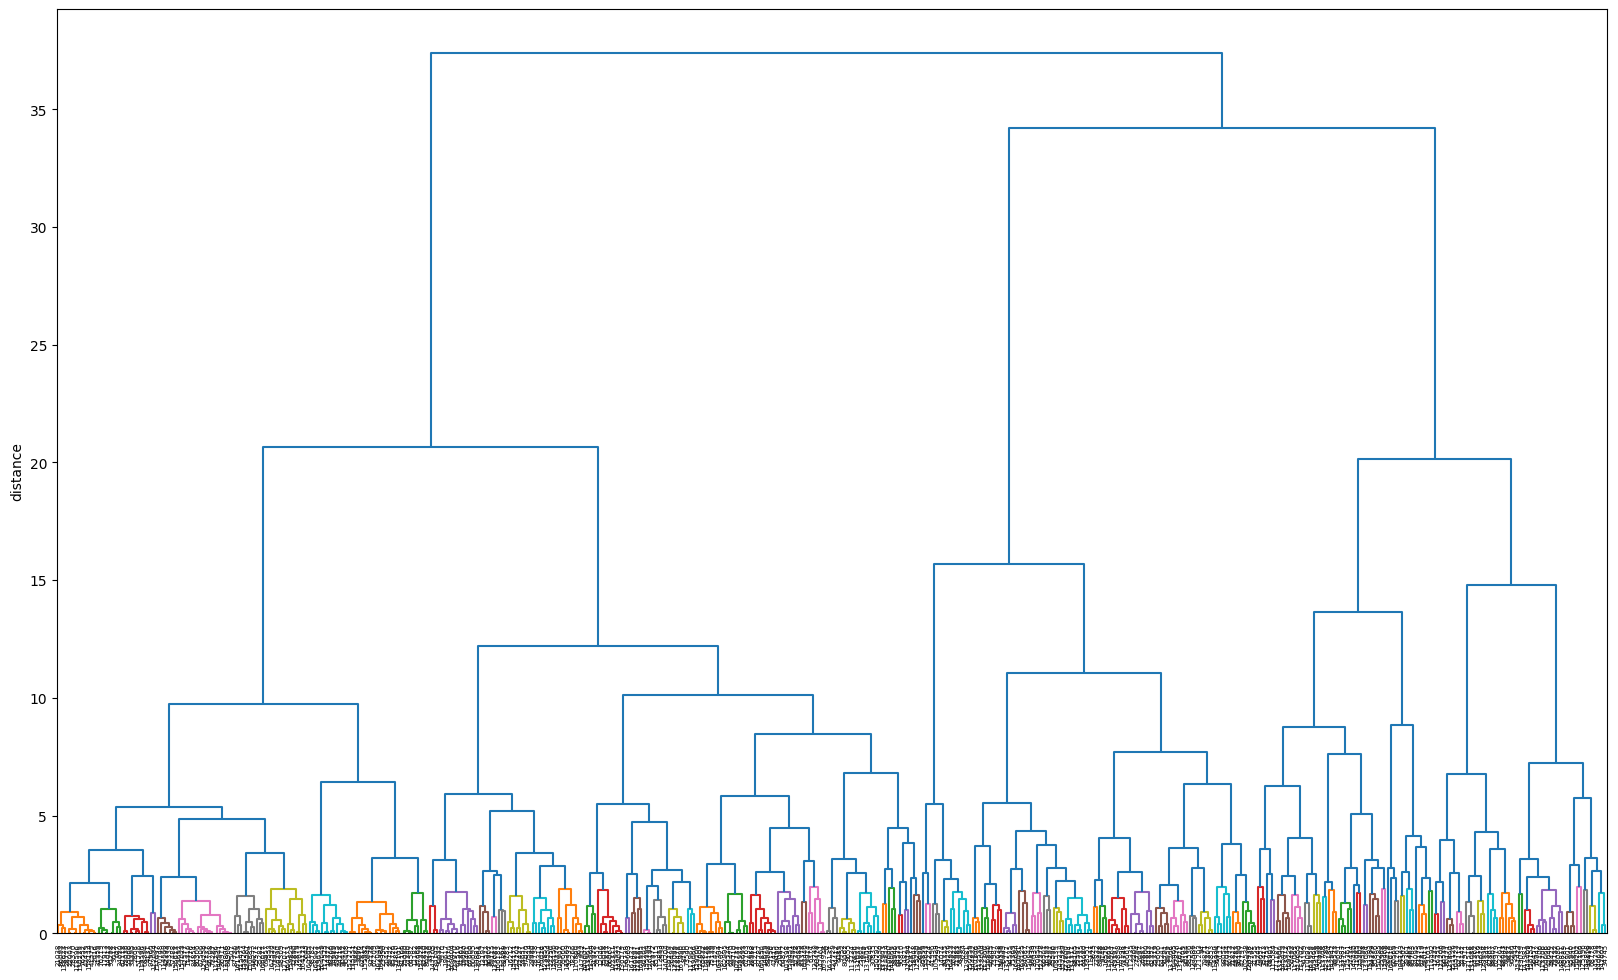

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()


sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax2 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax2.set_ylabel('distance')
plt.show()


sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax3 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax3.set_ylabel('distance')
plt.show()

KMeans

In [ ]:
for i in range(1,10):
    from sklearn.cluster import KMeans
    k = 4
    kM = KMeans(n_clusters=k,random_state=654)
    y_pred = kM.fit_predict(X_sc)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_sc)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[1199204.9999999972,
 812613.4803832718,
 663943.483325354,
 577012.0609814321,
 517708.6147859964,
 476450.4324713418,
 439352.2523743237,
 409470.4832822176,
 383982.9497279044]

plot

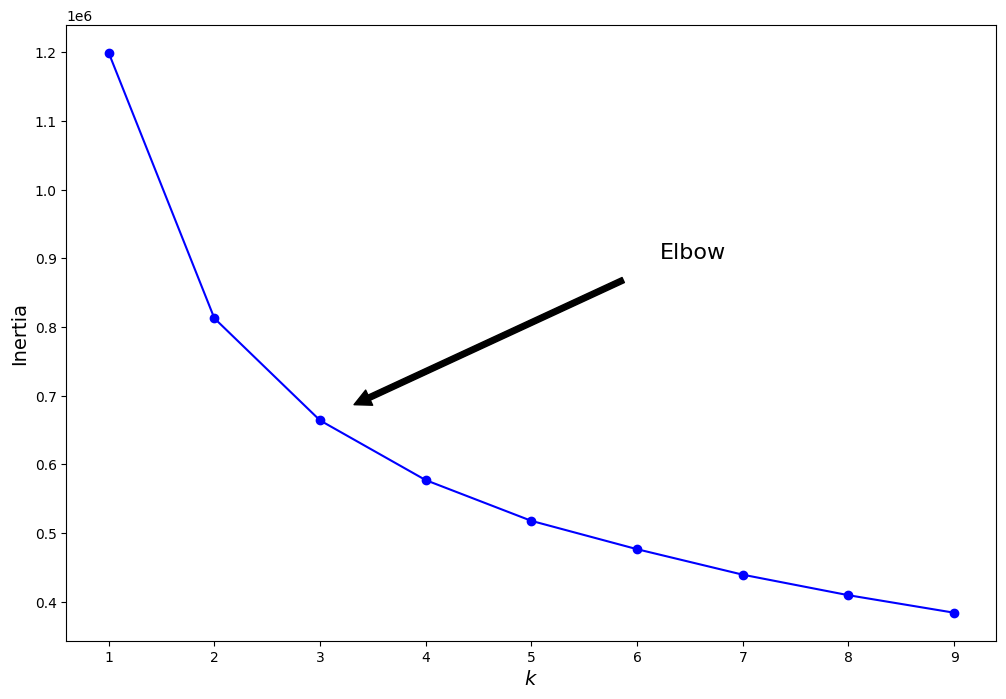

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

KMeans with n_clusters = 3

In [ ]:
from sklearn.cluster import KMeans

k = 3

kM = KMeans(n_clusters=k,
           random_state=654)
y_pred = kM.fit_predict(X_sc)

In [ ]:
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [ ]:
clusters.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier,label
39833,Others,2015.0,200000,qa engineer,2021.0,8.0,3,3,3,2
72049,sgrabvz ovwyo,2016.0,700000,sdet,2019.0,7.0,3,3,3,2
155736,xzegqbvnxwv,2013.0,1500000,Others,2019.0,10.0,3,2,3,2
52261,svxz wqtaxn,2019.0,420000,fullstack engineer,2020.0,4.0,2,3,3,2
162838,rtsvng ytvrny ntwyzgrgsxto,2014.0,850000,backend engineer,2019.0,9.0,3,3,3,2


In [ ]:
clusters.shape

(171315, 10)

Insights | EDA after Clustering :

<Axes: xlabel='orgyear', ylabel='ctc'>

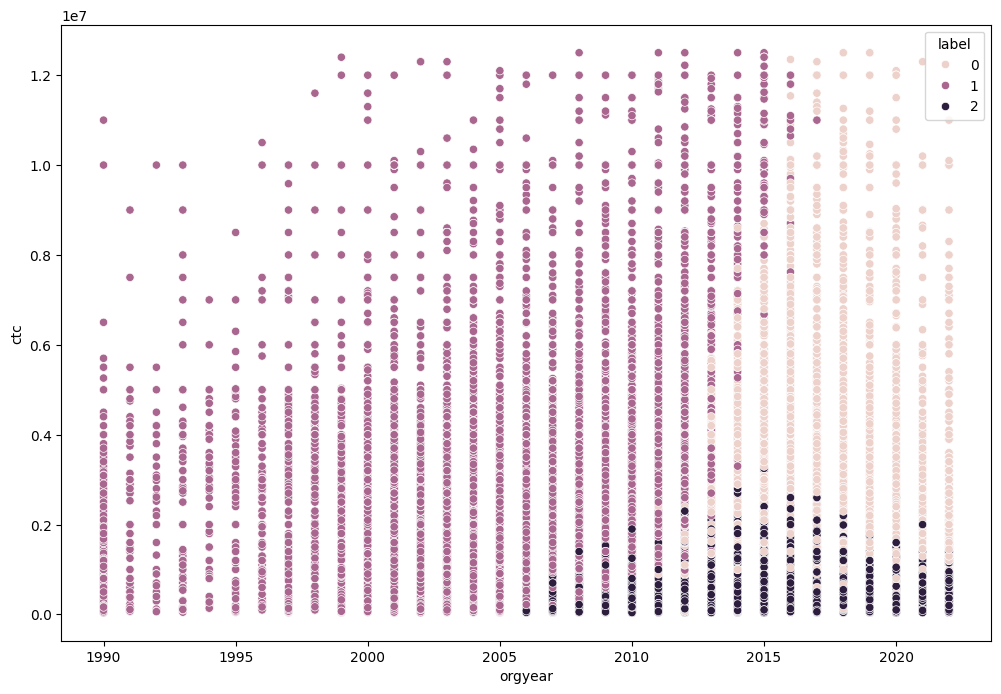

In [ ]:
sns.scatterplot(x= clusters["orgyear"], y= clusters["ctc"], hue = clusters["label"])

CROSS TAB

<Axes: xlabel='label'>

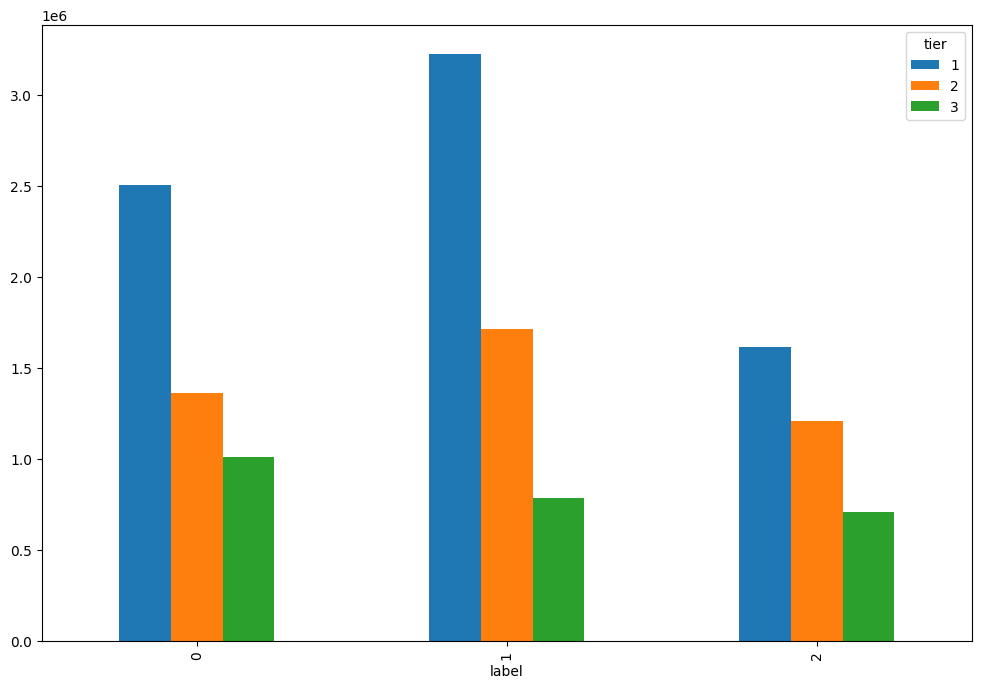

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],values=clusters["ctc"],aggfunc= np.mean).plot(kind = "bar")

In [ ]:
clusters.label.value_counts(normalize=True)*100

label
2    49.734699
0    33.307650
1    16.957651
Name: proportion, dtype: float64

<Axes: xlabel='label'>

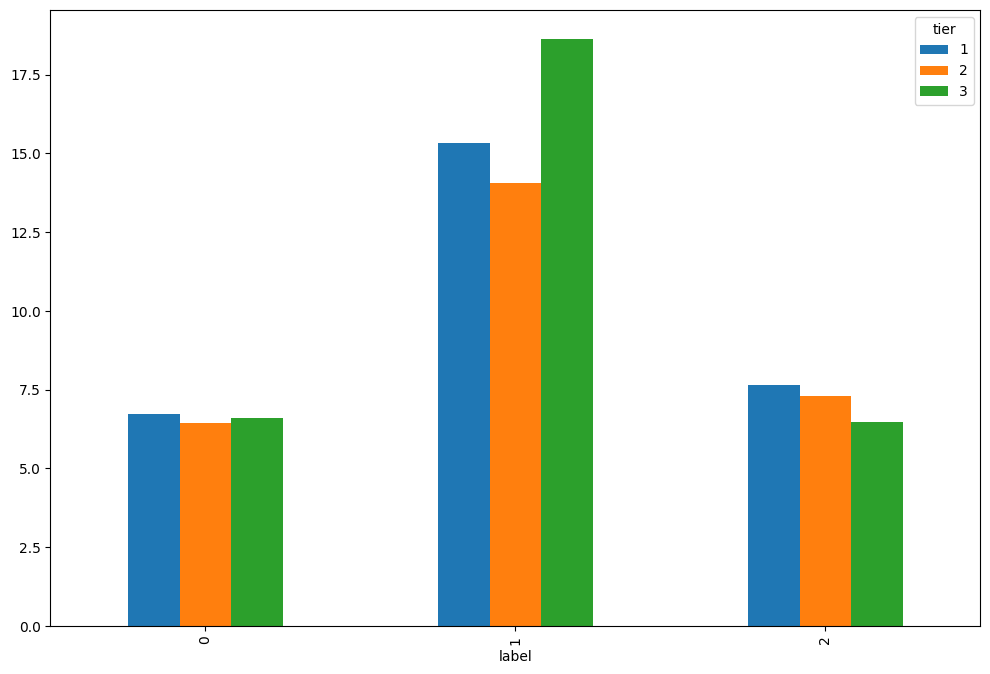

In [ ]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"], values=clusters["years_of_experience_in_organization"],
            aggfunc=np.mean).plot(kind = "bar")

In [ ]:
clusters.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization', 'designation_in_organization',
       'classs', 'tier', 'label'],
      dtype='object')

Statistical Summury based on Each Cluster :

In [ ]:
clusters.groupby("label").describe()[["ctc","classs","tier","years_of_experience_in_organization"]].T

label                                                 0             1  \
ctc                                 count  5.706100e+04  2.905100e+04   
                                    mean   1.802942e+06  2.543364e+06   
                                    std    1.272598e+06  1.751948e+06   
                                    min    6.500000e+04  3.955000e+04   
                                    25%    1.000000e+06  1.420000e+06   
                                    50%    1.500000e+06  2.100000e+06   
                                    75%    2.200000e+06  3.145000e+06   
                                    max    1.250000e+07  1.250000e+07   
classs                              count  5.706100e+04  2.905100e+04   
                                    mean   1.544558e+00  1.625934e+00   
                                    std    5.251802e-01  6.937642e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  1.000000e+00   
                                    50%    2.000000e+00  2.000000e+00   
                                    75%    2.000000e+00  2.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
tier                                count  5.706100e+04  2.905100e+04   
                                    mean   1.648762e+00  1.484183e+00   
                                    std    5.741921e-01  6.478212e-01   
                                    min    1.000000e+00  1.000000e+00   
                                    25%    1.000000e+00  1.000000e+00   
                                    50%    2.000000e+00  1.000000e+00   
                                    75%    2.000000e+00  2.000000e+00   
                                    max    3.000000e+00  3.000000e+00   
years_of_experience_in_organization count  5.706100e+04  2.905100e+04   
                                    mean   6.557964e+00  1.520653e+01   
                                    std    2.474948e+00  4.339534e+00   
                                    min    1.000000e+00  6.000000e+00   
                                    25%    5.000000e+00  1.200000e+01   
                                    50%    7.000000e+00  1.400000e+01   
                                    75%    8.000000e+00  1.700000e+01   
                                    max    1.300000e+01  3.300000e+01   

label                                                 2  
ctc                                 count  8.520300e+04  
                                    mean   7.562107e+05  
                                    std    5.033019e+05  
                                    min    3.800000e+04  
                                    25%    4.000000e+05  
                                    50%    6.300000e+05  
                                    75%    1.000000e+06  
                                    max    5.600000e+06  
classs                              count  8.520300e+04  
                                    mean   2.831191e+00  
                                    std    3.751798e-01  
                                    min    1.000000e+00  
                                    25%    3.000000e+00  
                                    50%    3.000000e+00  
                                    75%    3.000000e+00  
                                    max    3.000000e+00  
tier                                count  8.520300e+04  
                                    mean   2.900731e+00  
                                    std    3.010974e-01  
                                    min    1.000000e+00  
                                    25%    3.000000e+00  
                                    50%    3.000000e+00  
                                    75%    3.000000e+00  
                                    max    3.000000e+00  
years_of_experience_in_organization count  8.520300e+04  
                                    mean   6.541436e+00  
                        